# Escaping from a Gridworld 

We will take n dimensional gridworld of any shape as our experimental environment. Read and understand the code in the following shell. Then proceed to next questions.

In [1]:
import random

class grid:
    def __init__(self, shape = (5, 5)):
        self.n_dim = len(shape)
        self.shape = shape
        print('>>> grid world shape is: '+str(shape))

    def is_interior(self,ix):
        return all([0.<a<b-1 for a,b in zip(ix,list(self.shape))])
     
    #input: lists of index
    #return: running cost, list of next index, list of probability
    def step(self, ix):
        run_cost = 0.                
        ix_next = []; pr_next= []
        if self.is_interior(ix):
            run_cost = 1.
            for i in range(self.n_dim):
                ix1 = ix.copy(); ix1[i]+=1; ix_next += [ix1,]
                pr1 = 1./(self.n_dim*2.0) 
                pr_next += [pr1,]
            for i in range(self.n_dim):
                ix1 = ix.copy(); ix1[i]-=1; ix_next += [ix1,]
                pr1 = 1./(self.n_dim*2.0) 
                pr_next += [pr1,]
     
        return run_cost, ix_next, pr_next
    
    def step_random(self, ix):
        run_cost, ix_next, pr_next = self.step(ix)
        ix_next_rd = random.choices(ix_next, pr_next, k = 1)
        return run_cost, ix_next_rd[0]


- Explain the meaning of each output from the next shell
- (Your answer)

****

**Answer:**

**1**.The first output gives the shape of the gridworld, which is a two dimension space with upper bound 4 and lower bound 0 with both dimension.

**2**.The second output tells that the point [2, 3] is a interior of the above gridworld.

**3**.The third output gives the result of run_cost, ix_next and pr_next, where:

  * run_cost is the step we used, which is equal to 1;
  
  * ix_next is a list which gives us the grid point where we can arrive by one step;
  
  * pr_next is also a list which gives us the probability of grid point [2, 3] gets to each grid point in the in_next.
  
**4**.The fourth output tells that the point [1, 4] is not a interior of the above gridworld space. The element of second dimension is 4, so the point [1, 4] is just on the boundary of the gridworld space.

**5**. The fifth output gives the result of run_cost, ix_next and pr_next from the grid point [1, 4]. Since the point [1, 4] is just on the boundary of the gridworld space, the run_cost is equal to 0 and ix_next and pr_next are empty list.

In [2]:

#####check
g1 = grid(shape=(5,5))
ix1 = [2,3]
print('>>>', g1.is_interior(ix1))
o1, o2, o3 = g1.step(ix1)
print('>>>', o1, '\n', o2, '\n', o3)

print('>>>>>>>>><<<<<<<<<<')
ix2 = [1,4]
print('>>>', g1.is_interior(ix2))
o1, o2, o3 = g1.step(ix2)
print('>>>', o1, '\n', o2, '\n', o3)


>>> grid world shape is: (5, 5)
>>> True
>>> 1.0 
 [[3, 3], [2, 4], [1, 3], [2, 2]] 
 [0.25, 0.25, 0.25, 0.25]
>>>>>>>>><<<<<<<<<<
>>> False
>>> 0.0 
 [] 
 []


- Explain the meaning of each output from the next shell
- (Your answer)

**Answer:**

**1**. [1, 2], [1, 3], [1, 4] gives us the route start from grid point [2, 2] to reach the boundary of the Gridworld.

**2**. tot_cost tells us that the length of the above route is 3, which is the step used to escape the Gridworld.

In [3]:
#import ipdb

ix = [2,2]
tot_cost = 0.
while g1.is_interior(ix):
    #ipdb.set_trace()
    run_cost, ix = g1.step_random(ix)
    print('>>>', ix)
    tot_cost+=run_cost
    
print('>>>', tot_cost)

>>> [1, 2]
>>> [1, 3]
>>> [1, 4]
>>> 3.0


- Consider a grid world of shape (4,4). This means, the agent's state belongs to the state space of $\{0,1,2,3,4\}\times \{0,1,2,3,4\}$. A state $(a,b)$ is called a boundary if one of its coordinate is either $0$ or $4$. Otherwise, the state is called interior. An agent moves a random walk in the grid world from initial state $(2,2)$. Use your math to find the expected number of steps to reach the boundary.

- (your answer)

The expected number of steps to reach the boundary is 4.5.

- Use your code to verify your answer.

In [3]:
#your code 

n = 10000
cost_record = []
for i in range(n):
    ix = [2,2]
    tot_cost = 0.
    while g1.is_interior(ix):
        #ipdb.set_trace()
        run_cost, ix = g1.step_random(ix)
        tot_cost+=run_cost
    cost_record.append(tot_cost)

mean_cost = np.mean(cost_record)
print("The mean cost to get the boundary is:", mean_cost)

The mean cost to get the boundary is: 4.4618


From the above shell, we know the mean step to reach the boundary is approximately 4.5.  Let's do the same simulation more time as follow.

the mean cost is 4.483678770481303
One path of the mean of cost:


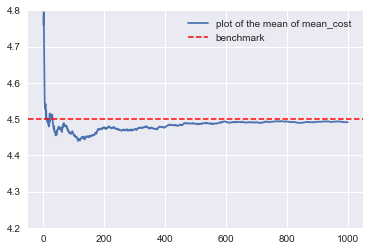

In [4]:
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

n = 100
NumSimu = 1000
cost_record = []
meancost_record = []
for i in range(NumSimu):
    for j in range(n):
        ix = [2,2]
        tot_cost = 0.
        while g1.is_interior(ix):
            #ipdb.set_trace()
            run_cost, ix = g1.step_random(ix)
            tot_cost+=run_cost
        cost_record.append(tot_cost)
    mean_cost = np.mean(cost_record)
    meancost_record.append(mean_cost)
    
meansim = np.mean(meancost_record)
print("the mean cost is", meansim)

print("One path of the mean of cost:")
plt.plot(range(NumSimu), meancost_record, label='plot of the mean of mean_cost ')
plt.axhline(4.5, color='r', ls='dashed', lw=1.5, label='benchmark')
plt.ylim(4.2, 4.8)
plt.legend()  